<a href="https://colab.research.google.com/github/kimtaeyoon1/pdm05/blob/main/notebook/chap10_CV01_DataAug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## cifar10
- CNN model
- Data augenmentation(데이터증대)
- Save & load model

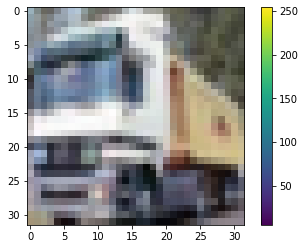

In [14]:

# import numpy as np
import matplotlib.pyplot as plt
# import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
import numpy as np

# CFAR-10 데이터 세트를 적재한다.
# 훈련 세트와 테스트 세트를 반환받는다. 
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

# 두 번째 영상(트럭)을 화면에 표시한다. 
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()
plt.show()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 32)        18464     
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dropout_2 (Dropout)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 80)                432720    
                                                      

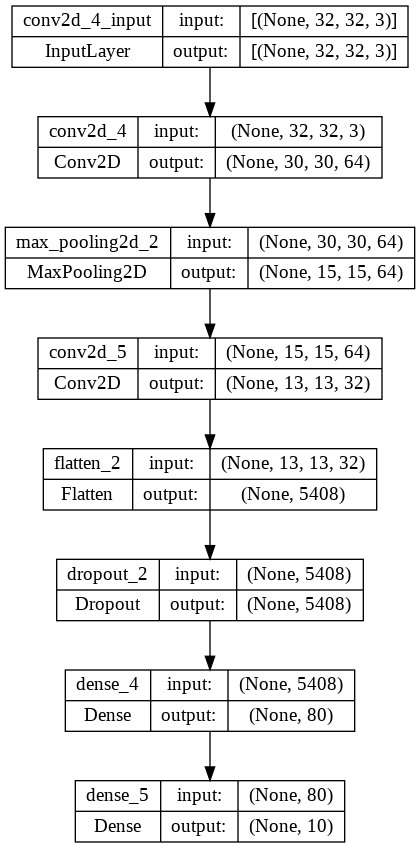

In [15]:

# 영상의 픽셀 값을 0에서 1 사이로 변환한다. 
X_train = X_train/255.0
X_test = X_test/255.0

# 순차 모델을 구축한다. 
model = Sequential()
model.add(Conv2D(64, activation = 'relu', kernel_size = (3,3 ), input_shape = (32, 32, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, activation = 'relu', kernel_size = (3,3 )))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(80, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

# 모델 구조 요약 - summary(), plot_model()
model.summary()
keras.utils.plot_model(model, show_shapes=True)


In [16]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
!fc-list

/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf: Liberation Sans Narrow:style=Italic
/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf: Liberation Sans:style=Regular
/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf: Liberation Mono:style=Bold Italic
/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf: Liberation Serif:style=Italic
/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf: Liberation Mono:style=Bold
/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf: Liberation Sans Narrow:style=Regular
/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf: Liberation Serif:style=Bold
/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf: Liberation Mono:style=Regular
/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf: Liberation Sans:style=Italic
/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf: Liberation Serif:style=Bold Italic
/usr/share/fonts/truet

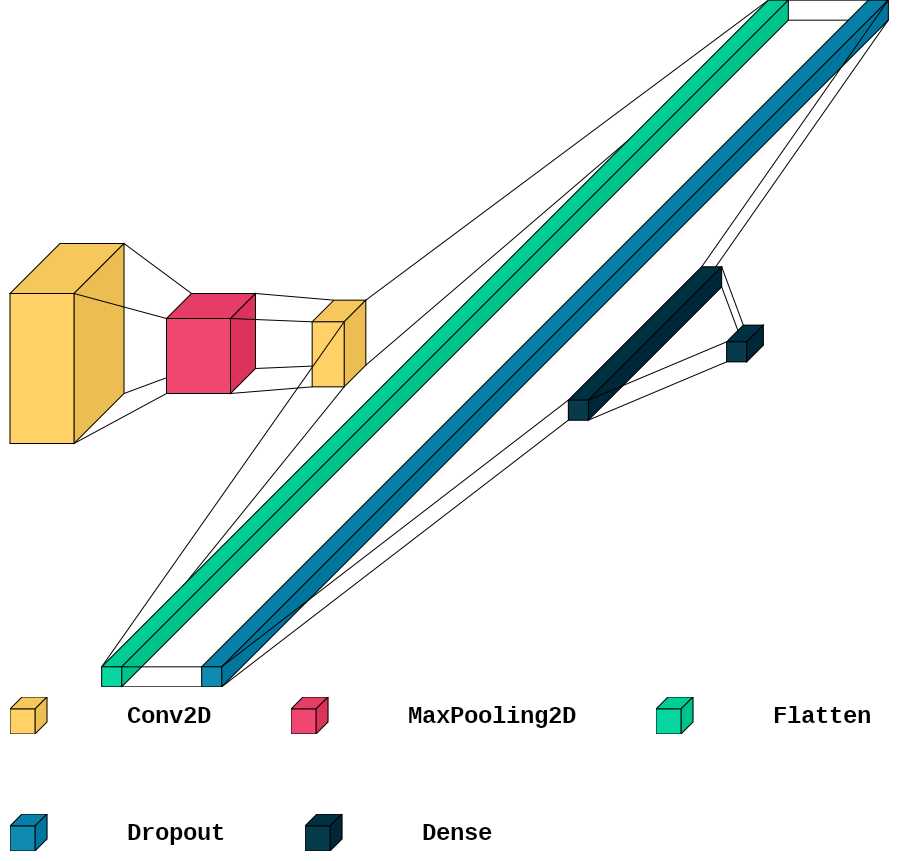

In [20]:
## 모델 구조 시각화 - visualkareas.layered_view()
import visualkeras
from PIL import ImageFont
font = ImageFont.truetype("LiberationMono-Bold.ttf", 24)
visualkeras.layered_view(model, 
                         to_file='./cnn2.png', 
                         legend=True, font=font, spacing=80, 
                         scale_xy=5, scale_z=1, one_dim_orientation='x')


In [21]:

# 모델을 컴파일한다. 
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
# 모델을 훈련한다. 
history = model.fit(X_train, y_train, epochs=10, verbose=1, 
                  validation_split=0.3)


Epoch 1/10
1094/1094 [==============================] - 17s 7ms/step - loss: 1.5615 - accuracy: 0.4334 - val_loss: 1.2932 - val_accuracy: 0.5426
Epoch 2/10
1094/1094 [==============================] - 6s 5ms/step - loss: 1.2604 - accuracy: 0.5511 - val_loss: 1.1569 - val_accuracy: 0.5830
Epoch 3/10
1094/1094 [==============================] - 6s 5ms/step - loss: 1.1340 - accuracy: 0.5966 - val_loss: 1.0650 - val_accuracy: 0.6295
Epoch 4/10
1094/1094 [==============================] - 6s 5ms/step - loss: 1.0444 - accuracy: 0.6304 - val_loss: 1.0656 - val_accuracy: 0.6295
Epoch 5/10
1094/1094 [==============================] - 7s 6ms/step - loss: 0.9848 - accuracy: 0.6509 - val_loss: 0.9854 - val_accuracy: 0.6536
Epoch 6/10
1094/1094 [==============================] - 6s 5ms/step - loss: 0.9307 - accuracy: 0.6705 - val_loss: 0.9377 - val_accuracy: 0.6749
Epoch 7/10
1094/1094 [==============================] - 6s 5ms/step - loss: 0.8741 - accuracy: 0.6896 - val_loss: 0.9411 - val_accuracy

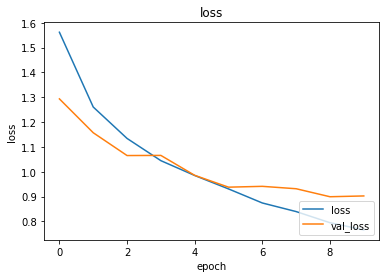

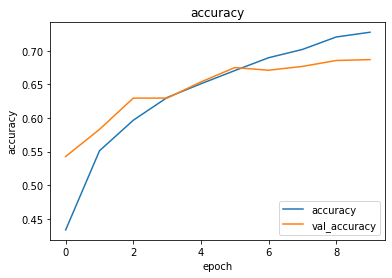

In [22]:

# 손실값을 그래프로 그린다. 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc = 'lower right')
plt.show()

# 정확도를 그래프로 그린다. 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc = 'lower right')
plt.show()



313/313 [==============================] - 1s 2ms/step
정답= [3]
예측값= [6.74349349e-03 1.75950947e-04 8.31671059e-03 5.10787666e-01
 1.12564955e-02 4.39977467e-01 6.48892159e-03 1.26626818e-02
 3.44090210e-03 1.49767031e-04] 3
313/313 [==============================] - 1s 3ms/step - loss: 0.9106 - accuracy: 0.6809


[0.9106135964393616, 0.680899977684021]

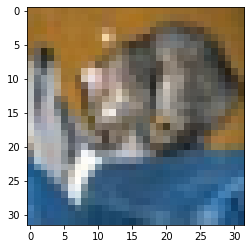

In [23]:
plt.figure()
plt.imshow(X_test[0])
y_pred = model.predict(X_test)
print("정답=", y_test[0])
print("예측값=", y_pred[0], np.argmax(y_pred[0]))

#################################
# Evaluate the model
#################################
model.evaluate(X_test,y_test)
# loss: 1.1689 - accuracy: 0.6468
# loss: 0.9207 - accuracy: 0.6799    # with dropout: 0.5



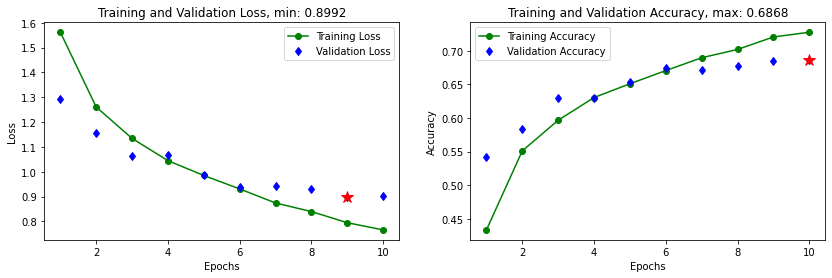

In [24]:
#############################################
# More training graphs
# More graphs of loss and accuracy
# import matplotlib.pyplot as plt
# import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



313/313 [==============================] - 1s 2ms/step
Test image-2764: Classified correctly


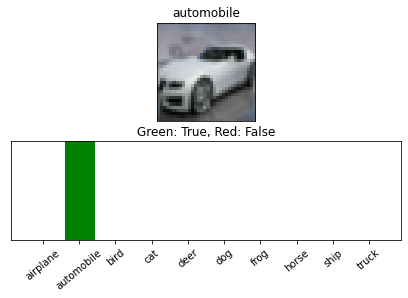

In [32]:
#
# Test of model trained
#
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def plot_pred(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i:i+1], img[i]
    plt.grid(False)
    plt.title(class_names[true_label[0][0]])
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img) #np.squeeze(img, 2))

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:   # np.argmax(true_label)
       print("Test image-%d: Classified correctly" % i)
    else:
       print("Test image-%d: Wrong classification" % i)


def plot_bar(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.yticks([])
    plt.xticks(np.arange(10), class_names, rotation=40)

    thisplot = plt.bar(range(10), predictions_array, color='grey')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    if predicted_label == true_label:  # np.argmax(true_label):
        color = 'green'
    else:
        color = 'red'

    thisplot[predicted_label].set_color(color)


predictions = model.predict(X_test)
np.random.seed(None)
num = np.random.randint(0, len(y_test))

plt.figure(figsize=(7, 4))
plt.subplot(2, 2, (1, 2))
plot_pred(num, predictions, y_test, X_test)
plt.subplot(2, 2, (3,4))
plot_bar(num, predictions,  y_test)
plt.title("Green: True, Red: False")
plt.show()

## Data augmentation - 데이터 증대

(194, 259, 3)
(1, 194, 259, 3)


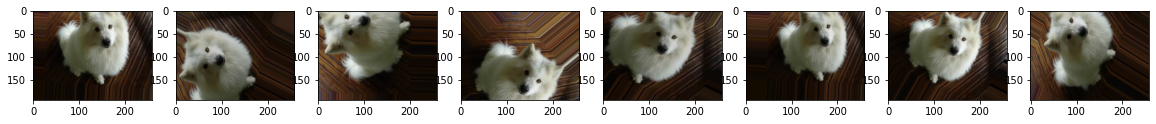

In [35]:
#
# https://machinelearningmastery.com/image-augmentation-deep-learning-keras/
#
import matplotlib.pyplot as plt
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img, img_to_array

image = load_img("dog.jpg")
array = img_to_array(image)
print(array.shape)
sample = expand_dims(array, 0)  # batch image
print(sample.shape)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale = 1./255,
    rotation_range=90, brightness_range=[0.8, 1.0],
    width_shift_range=0.2, zoom_range=[0.8, 1.2],
    height_shift_range=0.2)

obj = datagen.flow(sample, batch_size=1)

fig = plt.figure(figsize=(20,5))
for i in range(8):
    plt.subplot(1,8,i+1)
    image = obj.next()
    # print(image.shape)
    plt.imshow(image[0])


## 모델의 저장과 복원
- model.save(...)
- model2 = load_model(...)

### model file type
- h5
- hdf5

In [37]:
# import numpy as np
import tensorflow as tf

test_input = np.random.random((128, 32))
test_target = np.random.random((128, 1))

inputs = tf.keras.Input(shape=(32,))
outputs = tf.keras.layers.Dense(1)(inputs)
model = tf.keras.Model(inputs, outputs)
model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(test_input, test_target, epochs=3)

model.save("my_model")



Epoch 1/3
4/4 [==============================] - 0s 4ms/step - loss: 0.6942
Epoch 2/3
4/4 [==============================] - 0s 3ms/step - loss: 0.6108
Epoch 3/3
4/4 [==============================] - 0s 5ms/step - loss: 0.5339


In [38]:
model.save('mymodel.hdf5')

In [39]:

saved_model = tf.keras.models.load_model("mymodel.hdf5")
saved_model.fit(test_input, test_target, epochs=3)


Epoch 1/3
4/4 [==============================] - 0s 4ms/step - loss: 0.4697
Epoch 2/3
4/4 [==============================] - 0s 3ms/step - loss: 0.4133
Epoch 3/3
4/4 [==============================] - 0s 3ms/step - loss: 0.3699


In [40]:
saved_model.save('mymodel2.hdf5')